In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

file_attached = "attached_apex.csv"
townhomes_data = pd.read_csv(file_attached)

In [2]:
townhomes_data.count()

MLS #                    1538
Status                   1538
Address                  1538
City                     1538
Zip                      1538
Closing Date             1538
Subdivision              1538
LvngAreaSF               1538
YrBlt                    1538
Beds                     1538
FBths                    1538
HBths                    1538
Property Type            1538
List Price               1538
Sold Price               1538
Days On Market           1538
HOA Y/N                  1326
Garage                   1538
Acres                    1538
Sold Price/List Price    1538
dtype: int64

In [3]:
townhomes_data.head()

,MLS #,Status,Address,City,Zip,Closing Date,Subdivision,LvngAreaSF,YrBlt,Beds,FBths,HBths,Property Type,List Price,Sold Price,Days On Market,HOA Y/N,Garage,Acres,Sold Price/List Price
0,2192440,CLOSED,202 Harbor Haven Drive,Apex,27502,6/28/2018,West Haven Townhomes,"1,058",2007,2,2,1,Attached,"$169,000.00","$163,000.00",2,Yes,0,0-.25 Acres,0.96
1,2173092,CLOSED,119 Halsmer Court,Apex,27502,3/15/2018,Heatherwood Townhomes,"1,275",1988,2,2,1,Attached,"$164,900.00","$164,900.00",0,Yes,0,0-.25 Acres,1.00
2,2264913,CLOSED,323 Port Haven Drive,Apex,27502,9/3/2019,West Haven Townhomes,"1,062",2007,2,1,1,Attached,"$170,900.00","$165,000.00",21,Yes,0,0-.25 Acres,0.97
3,2169851,CLOSED,315 Port Haven Drive,Apex,27502,4/6/2018,West Haven Townhomes,"1,056",2007,2,2,1,Attached,"$172,900.00","$166,000.00",36,Yes,0,0-.25 Acres,0.96
4,2280642,CLOSED,306 Port Haven Drive,Apex,27502,10/31/2019,West Haven Townhomes,"1,056",2007,2,1,1,Attached,"$169,900.00","$169,900.00",2,Yes,0,0-.25 Acres,1.00


In [4]:
townhomes_data.dtypes

MLS #                      int64
Status                    object
Address                   object
City                      object
Zip                       object
Closing Date              object
Subdivision               object
LvngAreaSF                object
YrBlt                      int64
Beds                       int64
FBths                      int64
HBths                      int64
Property Type             object
List Price                object
Sold Price                object
Days On Market             int64
HOA Y/N                   object
Garage                     int64
Acres                     object
Sold Price/List Price    float64
dtype: object

In [5]:
townhomes_df = townhomes_data.copy()
townhomes_df = townhomes_df.rename(columns={"Sold Price": "SoldPrice"})
townhomes_df = townhomes_df.rename(columns={"List Price": "ListPrice"})

#remove $
townhomes_df['SoldPrice'] = townhomes_df.SoldPrice.str.lstrip('$')
townhomes_df['ListPrice'] = townhomes_df.ListPrice.str.lstrip('$')
#remove comma
townhomes_df['SoldPrice'] = townhomes_df['SoldPrice'].str.replace(',', '').astype(float)
townhomes_df['ListPrice'] = townhomes_df['ListPrice'].str.replace(',', '').astype(float)
townhomes_df['LvngAreaSF'] = townhomes_df['LvngAreaSF'].str.replace(',', '').astype(int)
townhomes_df.head()

,MLS #,Status,Address,City,Zip,Closing Date,Subdivision,LvngAreaSF,YrBlt,Beds,FBths,HBths,Property Type,ListPrice,SoldPrice,Days On Market,HOA Y/N,Garage,Acres,Sold Price/List Price
0,2192440,CLOSED,202 Harbor Haven Drive,Apex,27502,6/28/2018,West Haven Townhomes,1058,2007,2,2,1,Attached,169000.0,163000.0,2,Yes,0,0-.25 Acres,0.96
1,2173092,CLOSED,119 Halsmer Court,Apex,27502,3/15/2018,Heatherwood Townhomes,1275,1988,2,2,1,Attached,164900.0,164900.0,0,Yes,0,0-.25 Acres,1.00
2,2264913,CLOSED,323 Port Haven Drive,Apex,27502,9/3/2019,West Haven Townhomes,1062,2007,2,1,1,Attached,170900.0,165000.0,21,Yes,0,0-.25 Acres,0.97
3,2169851,CLOSED,315 Port Haven Drive,Apex,27502,4/6/2018,West Haven Townhomes,1056,2007,2,2,1,Attached,172900.0,166000.0,36,Yes,0,0-.25 Acres,0.96
4,2280642,CLOSED,306 Port Haven Drive,Apex,27502,10/31/2019,West Haven Townhomes,1056,2007,2,1,1,Attached,169900.0,169900.0,2,Yes,0,0-.25 Acres,1.00


In [6]:
townhomes_df["Subdivision"].nunique()

57

In [7]:
#scramble dataframe
random_townhomes_df = townhomes_df.sample(frac=1)
random_townhomes_df

,MLS #,Status,Address,City,Zip,Closing Date,Subdivision,LvngAreaSF,YrBlt,Beds,FBths,HBths,Property Type,ListPrice,SoldPrice,Days On Market,HOA Y/N,Garage,Acres,Sold Price/List Price
704,2234788,CLOSED,118 Pleasant Glen Lane,Apex,27539,6/20/2019,Woodcreek,1971,2016,3,2,1,Attached,295000.0,295000.0,25,Yes,1,0-.25 Acres,1.00
551,2254802,CLOSED,440 Oak Pine Drive,Apex,27502,5/20/2020,Scotts Mill,1745,2019,3,3,1,Attached,285665.0,283000.0,0,NaN,1,0-.25 Acres,0.99
990,2292391,CLOSED,606 Metro Station,Apex,27502,1/30/2020,The Villages of Apex,2388,2019,3,2,1,Attached,314900.0,312900.0,0,Yes,2,0-.25 Acres,0.99
356,2235715,CLOSED,1517 Poets Glade Drive,Apex,27523,4/1/2019,Walden Townes,1670,2000,3,2,1,Attached,265000.0,262000.0,11,Yes,0,0-.25 Acres,0.99
441,2194488,CLOSED,2505 Rambling Creek Road,Apex,27523,7/11/2018,The Preserve at White Oak Creek,1620,2018,3,2,1,Attached,275000.0,273000.0,0,Yes,1,0-.25 Acres,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,2237635,CLOSED,1117 Finch Court,Apex,27502,10/31/2019,Peak 502 at Beaver Creek,2242,2019,4,3,1,Attached,316830.0,320120.0,0,Yes,2,0-.25 Acres,1.01
984,2322668,CLOSED,630 Grand Central Station,Apex,27502,8/10/2020,The Villages of Apex,2193,2020,3,3,1,Attached,312400.0,312400.0,0,Yes,2,0-.25 Acres,1.00
1031,2250681,CLOSED,2012 Whitesmith Drive,Apex,27502,5/24/2019,Hempstead at Beaver Creek,2417,2019,3,3,1,Attached,314990.0,315990.0,0,NaN,2,0-.25 Acres,1.00
585,2199990,CLOSED,2904 Great Lawn Road,Apex,27502,10/30/2018,Smith Farm,2145,2018,3,3,1,Attached,285600.0,286275.0,0,Yes,2,0-.25 Acres,1.00


In [8]:
#copy df
townhouse_data = random_townhomes_df
#copy Subdivision column data
townhouse_data["Sub#"] = townhouse_data["Subdivision"]


# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Sub#'. 
townhouse_data['Sub#']= label_encoder.fit_transform(townhouse_data['Sub#'])
townhouse_data.head()

,MLS #,Status,Address,City,Zip,Closing Date,Subdivision,LvngAreaSF,YrBlt,Beds,...,HBths,Property Type,ListPrice,SoldPrice,Days On Market,HOA Y/N,Garage,Acres,Sold Price/List Price,Sub#
704,2234788,CLOSED,118 Pleasant Glen Lane,Apex,27539,6/20/2019,Woodcreek,1971,2016,3,...,1,Attached,295000.0,295000.0,25,Yes,1,0-.25 Acres,1.00,56
551,2254802,CLOSED,440 Oak Pine Drive,Apex,27502,5/20/2020,Scotts Mill,1745,2019,3,...,1,Attached,285665.0,283000.0,0,NaN,1,0-.25 Acres,0.99,36
990,2292391,CLOSED,606 Metro Station,Apex,27502,1/30/2020,The Villages of Apex,2388,2019,3,...,1,Attached,314900.0,312900.0,0,Yes,2,0-.25 Acres,0.99,45
356,2235715,CLOSED,1517 Poets Glade Drive,Apex,27523,4/1/2019,Walden Townes,1670,2000,3,...,1,Attached,265000.0,262000.0,11,Yes,0,0-.25 Acres,0.99,50
441,2194488,CLOSED,2505 Rambling Creek Road,Apex,27523,7/11/2018,The Preserve at White Oak Creek,1620,2018,3,...,1,Attached,275000.0,273000.0,0,Yes,1,0-.25 Acres,0.99,44


In [54]:
#create subdivision dictionary
sub_dict = pd.Series(townhouse_data.Subdivision.values,index=townhouse_data['Sub#']).to_dict()
sub_dict

{56: 'Woodcreek',
 36: 'Scotts Mill',
 45: 'The Villages of Apex',
 50: 'Walden Townes',
 44: 'The Preserve at White Oak Creek',
 20: 'Hempstead at Beaver Creek',
 33: 'Salem Pointe',
 52: 'West Haven Townhomes',
 41: 'Sweetwater',
 26: 'Old Mill Village',
 10: 'Deer Creek',
 23: 'Middleton',
 39: 'Smith Farm',
 32: 'Salem Creek Townhomes',
 2: 'Bella Casa',
 29: 'Peak 502 at Beaver Creek',
 43: 'The Orchard Villas',
 0: '540 Townes',
 38: 'Seagroves Farm',
 8: 'Center Street Station',
 53: 'West Lake',
 48: 'Townes at North Salem',
 49: 'Townes at Westford',
 1: '55 James at Midtown',
 37: 'Scotts Mill at Bungalow Park',
 30: 'Pemberley',
 42: 'The Groves',
 4: 'Bradley Terrace',
 24: 'Miramonte',
 19: 'Heatherwood Townhomes',
 31: 'Promanade at Beaver Creek',
 17: 'Haddon Hall',
 13: 'Edgewater',
 55: 'Woodbury',
 6: 'Carriage Downs',
 16: 'Green at Scotts Mill',
 40: 'South Walk',
 47: 'Townes at Friendship Station',
 12: 'Dogwood Ridge',
 28: 'Parkside at Bella Casa',
 51: 'Wayland

In [9]:
#set up model
# = townhomes_df.drop["SoldPrice"]
X = townhouse_data[["YrBlt", "Beds", "FBths", "LvngAreaSF","HBths", "Days On Market", "Garage", "Sold Price/List Price", "Sub#"]]
y = townhouse_data["SoldPrice"]
print(X.shape, y.shape)

(1538, 9) (1538,)


In [10]:
#normalize data
x_max = X.max()
x_min = X.min()
X = (X-X.min())/(X.max()-X.min())

y_min = y.min()
y_max = y.max()
y = (y-y.min())/(y.max()-y.min())


In [11]:
#unnormalizse data
#unnormalize for final reports
y_inverse = y*(y_max-y_min)+y_min
y_inverse

704     295000.0
551     283000.0
990     312900.0
356     262000.0
441     273000.0
          ...   
1103    320120.0
984     312400.0
1031    315990.0
585     286275.0
928     308950.0
Name: SoldPrice, Length: 1538, dtype: float64

In [12]:
#X = X.astype(float)
# prepare input data
#def prepare_inputs(X_train, X_test):
    #ohe = OneHotEncoder()
    #ohe.fit(X_train)
    #X_train_enc = ohe.transform(X_train)
    #X_test_enc = ohe.transform(X_test)
    #return X_train_enc, X_test_enc

In [13]:
# prepare target
'''def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc'''

'def prepare_targets(y_train, y_test):\n    le = LabelEncoder()\n    le.fit(y_train)\n    y_train_enc = le.transform(y_train)\n    y_test_enc = le.transform(y_test)\n    return y_train_enc, y_test_enc'

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

In [15]:
townhouse_data.dtypes

MLS #                      int64
Status                    object
Address                   object
City                      object
Zip                       object
Closing Date              object
Subdivision               object
LvngAreaSF                 int32
YrBlt                      int64
Beds                       int64
FBths                      int64
HBths                      int64
Property Type             object
ListPrice                float64
SoldPrice                float64
Days On Market             int64
HOA Y/N                   object
Garage                     int64
Acres                     object
Sold Price/List Price    float64
Sub#                       int32
dtype: object

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

# Create model and add layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=9))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=1, activation= None))

In [17]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss= tf.keras.losses.MeanAbsoluteError()
             )
#model.summary()
X_train.dtypes

YrBlt                    float64
Beds                     float64
FBths                    float64
LvngAreaSF               float64
HBths                    float64
Days On Market           float64
Garage                   float64
Sold Price/List Price    float64
Sub#                     float64
dtype: object

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1000      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 11,201
Trainable params: 11,201
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(
    X_train,
    y_train,
    epochs=100,
    shuffle=True,
    verbose=2, 
    batch_size = 1
)

Epoch 1/100
1153/1153 - 3s - loss: 0.0820
Epoch 2/100
1153/1153 - 4s - loss: 0.0693
Epoch 3/100
1153/1153 - 3s - loss: 0.0656
Epoch 4/100
1153/1153 - 3s - loss: 0.0640
Epoch 5/100
1153/1153 - 3s - loss: 0.0618
Epoch 6/100
1153/1153 - 3s - loss: 0.0596
Epoch 7/100
1153/1153 - 4s - loss: 0.0597
Epoch 8/100
1153/1153 - 3s - loss: 0.0582
Epoch 9/100
1153/1153 - 3s - loss: 0.0581
Epoch 10/100
1153/1153 - 4s - loss: 0.0584
Epoch 11/100
1153/1153 - 3s - loss: 0.0566
Epoch 12/100
1153/1153 - 3s - loss: 0.0574
Epoch 13/100
1153/1153 - 3s - loss: 0.0561
Epoch 14/100
1153/1153 - 3s - loss: 0.0560
Epoch 15/100
1153/1153 - 4s - loss: 0.0566
Epoch 16/100
1153/1153 - 4s - loss: 0.0554
Epoch 17/100
1153/1153 - 3s - loss: 0.0559
Epoch 18/100
1153/1153 - 3s - loss: 0.0534
Epoch 19/100
1153/1153 - 3s - loss: 0.0544
Epoch 20/100
1153/1153 - 3s - loss: 0.0550
Epoch 21/100
1153/1153 - 3s - loss: 0.0534
Epoch 22/100
1153/1153 - 3s - loss: 0.0547
Epoch 23/100
1153/1153 - 3s - loss: 0.0537
Epoch 24/100
1153/11

In [20]:
model_loss = model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}")

13/13 - 0s - loss: 0.0525
Loss: 0.052481211721897125


In [21]:
predictions, predictions2 = model.predict(X_test), model.predict(X_test)
flat_list = []
for sublist in predictions:
    for item in sublist:
        flat_list.append(item)
flat_list

[0.52240527,
 0.5235988,
 0.5282725,
 0.431323,
 0.7312213,
 0.8375282,
 0.451678,
 0.11926815,
 0.43596268,
 0.5102664,
 0.50210226,
 0.16552123,
 0.5912589,
 0.47319564,
 0.6155293,
 0.6056435,
 0.27029663,
 0.566056,
 0.6095643,
 0.35259518,
 0.8249209,
 0.4271083,
 0.3054438,
 0.5463733,
 0.30716535,
 0.5075612,
 0.17774054,
 0.29988176,
 0.6266525,
 0.31285453,
 0.49839997,
 0.6023617,
 0.286568,
 0.41592538,
 0.5514374,
 0.459202,
 0.52782804,
 0.553877,
 0.46303546,
 0.25299805,
 0.43991828,
 0.5102664,
 0.4492984,
 0.55224144,
 0.18039542,
 0.5487162,
 0.13067497,
 0.5491784,
 0.14259127,
 0.8034667,
 0.2926979,
 0.90134126,
 0.46377164,
 0.4791554,
 0.4039778,
 0.4125124,
 0.5469659,
 0.5083071,
 0.107005805,
 0.11607118,
 0.18223506,
 0.17369527,
 0.5806358,
 0.41855374,
 0.43089473,
 0.73862445,
 0.5121328,
 0.6070584,
 0.1780714,
 0.51031613,
 0.63056827,
 0.13020325,
 0.49568796,
 0.17545593,
 0.32394063,
 0.5521883,
 0.47305983,
 0.24142504,
 0.18193516,
 0.3880012,
 0.25

In [22]:
model_loss

0.052481211721897125

In [23]:
#calculate gradient
#inp = tf.convert_to_tensor(X_test)
#preds = tf.convert_to_tensor()

#grads = tape.gradient(model_loss, inp)

In [24]:
actuals = y_test

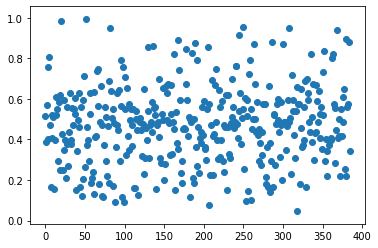

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

x_range = range(0,385)
#plt.scatter(actuals, predictions)
g=plt.scatter(x_range, actuals)


#g.axes.set_yscale('log')
#g.axes.set_xscale('log')
#g.axes.set_xlabel('True Values ')
#g.axes.set_ylabel('Predictions ')
#g.axes.axis('equal')
#g.axes.axis('square')

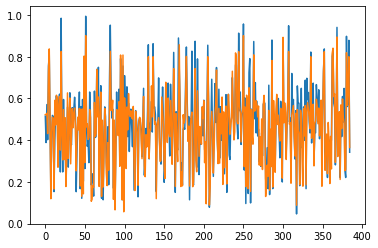

In [26]:
fig, ax = plt.subplots()
ax.plot(x_range,actuals)
ax.plot(x_range,predictions)


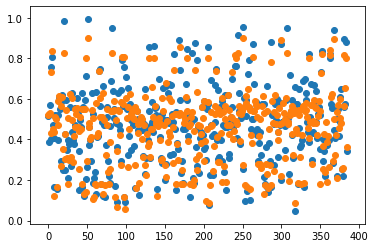

In [27]:
fig, ax = plt.subplots()
ax.scatter(x_range,actuals)
ax.scatter(x_range,predictions)

In [28]:
#r2 and mse

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(actuals, predictions)
r2 = r2_score(actuals, predictions)
print(f'Mean squared error: {mse.round(3)} \nr2: {r2.round(3)}')

Mean squared error: 0.005 
r2: 0.857


In [52]:
#["YrBlt", "Beds", "FBths", "LvngAreaSF","HBths", "Days On Market", "Garage", "Sold Price/List Price", "Sub#"]
test_input = [1990, 4 , 3, 4000, 1, 10, 2, 1, 56]


#normalize inputs
test_input_normal = (test_input-x_min)/(x_max-x_min)
#convert to tf array
array = tf.reshape(test_input_normal, [-1,9])
print(array)
print('____________________')


#run model
output = model.predict(array)
print(output)
print('____________________')


#unnormalize for final reports
Normal_output = output*(y_max-y_min)+y_min
Normal_output

tf.Tensor(
[[0.98514851 0.66666667 0.66666667 0.9198628  0.5        0.03921569
  0.66666667 0.5483871  1.        ]], shape=(1, 9), dtype=float64)
____________________
[[1.1103065]]
____________________


array([[474535.34]], dtype=float32)